<a href="https://colab.research.google.com/github/ShaikMohammadUsman/Deep-Learning/blob/master/Mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##  Mobilenet is relatively very smalll  when compared to vgg16 bcos of trainable pareametrs  

## Mobilenet occupues 16 MB of space while 

# vgg16 occupies 500 mb of space on disk

## The tradeoff is vgg16 gives more accuracy than vgg16(slighlty better)



In [2]:
#  Import Libraries

##   importing all the packages first
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Activation,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [3]:
  ##   Lets start using Mobile net which is a pretrained model  ##

  mobile=tf.keras.applications.mobilenet.MobileNet()

In [4]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
ls

drive/  sample_data/


In [7]:
cd drive


/content/drive


In [8]:
cd My\ Drive

/content/drive/My Drive


In [9]:
cd Images

/content/drive/My Drive/Images


In [10]:
##   Now take some random images from internet and chk how mobilenet performs on them  ##

##  Before using those images lets preprocess rhem into format accptd by mobole net

In [11]:
pwd

'/content/drive/My Drive/Images'

In [12]:
def prepare_image(file):
  img_path='/content/drive/My Drive/Images/'  # location of image
  img=image.load_img(img_path+file,target_size=(224,224))   ## size mobilenet expects
  img_array=image.img_to_array(img)    # converts our image to arry
  img_array_expand_dimensions=np.expand_dims(img_array,axis=0) # shape that mobilenet expects
  return tf.keras.applications.mobilenet.preprocess_input(img_array_expand_dimensions) ## scaling rgb values frrom scle of 0 to 1 unlike 0 to 255


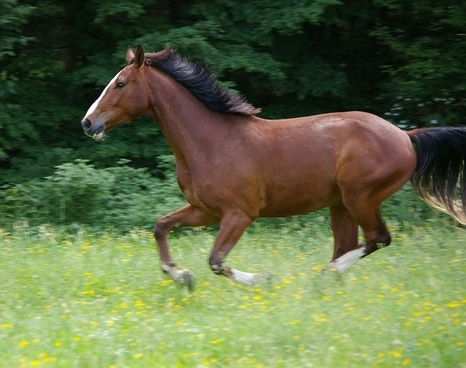

In [16]:
from IPython.display import Image  ## display the image here
Image(filename='/content/drive/My Drive/Images/horsee.png',width=300,height=200)

In [18]:
preprocessed_image=prepare_image('horsee.png')   # pass image to function(prepare_image) for preprocessing
predictions=mobile.predict(preprocessed_image)   # predict the image 
results=imagenet_utils.decode_predictions(predictions) # decode the predicted output of mobilenet  
results  # show the results

[[('n02389026', 'sorrel', 0.99643505),
  ('n02422106', 'hartebeest', 0.0020866562),
  ('n02403003', 'ox', 0.0009296369),
  ('n02422699', 'impala', 0.00010709758),
  ('n02105855', 'Shetland_sheepdog', 5.6386267e-05)]]

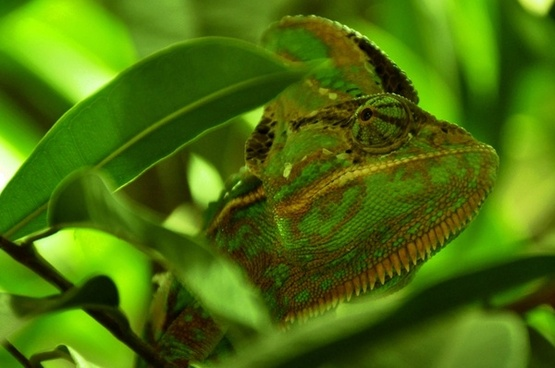

In [19]:
from IPython.display import Image  ## display the image here
Image(filename='/content/drive/My Drive/Images/chameleon.png',width=300,height=200)

In [20]:
preprocessed_image=prepare_image('chameleon.png')   # pass image to function(prepare_image) for preprocessing
predictions=mobile.predict(preprocessed_image)   # predict the image 
results=imagenet_utils.decode_predictions(predictions) # decode the predicted output of mobilenet  
results  # show the results

[[('n01694178', 'African_chameleon', 0.9909683),
  ('n01693334', 'green_lizard', 0.0050292197),
  ('n01677366', 'common_iguana', 0.002600976),
  ('n01682714', 'American_chameleon', 0.0010789627),
  ('n01687978', 'agama', 0.00013682719)]]

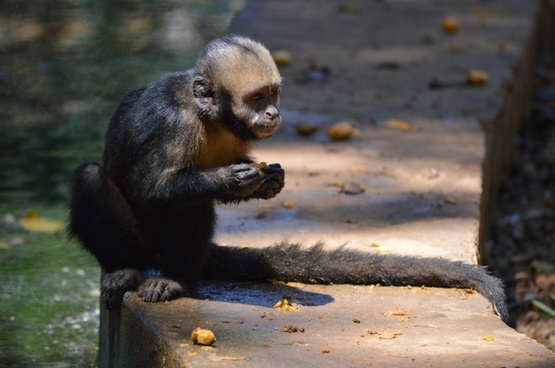

In [21]:
from IPython.display import Image  ## display the image here
Image(filename='/content/drive/My Drive/Images/monkey.png',width=300,height=200)

In [25]:
preprocessed_image=prepare_image('monkey.png')   # pass image to function(prepare_image) for preprocessing
predictions=mobile.predict(preprocessed_image)   # predict the image 
results=imagenet_utils.decode_predictions(predictions) # decode the predicted output of mobilenet  
results  # show the results

[[('n02492035', 'capuchin', 0.42412958),
  ('n02493793', 'spider_monkey', 0.38284916),
  ('n02484975', 'guenon', 0.10668449),
  ('n02481823', 'chimpanzee', 0.043489553),
  ('n02494079', 'squirrel_monkey', 0.0149921095)]]

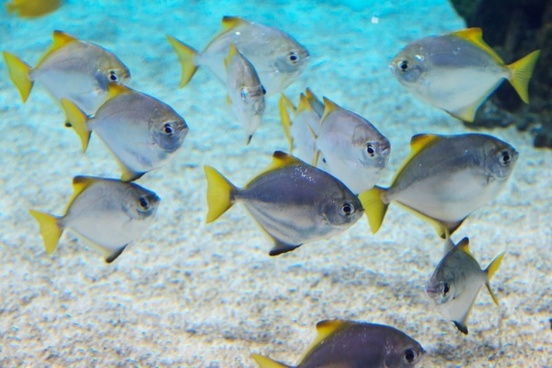

In [23]:
from IPython.display import Image  ## display the image here
Image(filename='/content/drive/My Drive/Images/fish.png',width=300,height=200)

In [24]:
preprocessed_image=prepare_image('fish.png')   # pass image to function(prepare_image) for preprocessing
predictions=mobile.predict(preprocessed_image)   # predict the image 
results=imagenet_utils.decode_predictions(predictions) # decode the predicted output of mobilenet  
results  # show the results

[[('n02606052', 'rock_beauty', 0.71909225),
  ('n01534433', 'junco', 0.15702951),
  ('n02018207', 'American_coot', 0.06841615),
  ('n01496331', 'electric_ray', 0.018274546),
  ('n01498041', 'stingray', 0.0070129526)]]